In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

[I 2025-04-27 10:21:17,653] A new study created in memory with name: no-name-700fb851-f82c-4385-bf63-6559a7029138
[I 2025-04-27 10:21:20,692] Trial 0 finished with value: 0.9721113127646703 and parameters: {'n_estimators': 773, 'max_depth': 17, 'min_samples_split': 5, 'min_samples_leaf': 14}. Best is trial 0 with value: 0.9721113127646703.
[I 2025-04-27 10:21:21,914] Trial 1 finished with value: 0.9791288566243195 and parameters: {'n_estimators': 276, 'max_depth': 11, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.9791288566243195.
[I 2025-04-27 10:21:24,152] Trial 2 finished with value: 0.9685420447670902 and parameters: {'n_estimators': 548, 'max_depth': 27, 'min_samples_split': 8, 'min_samples_leaf': 14}. Best is trial 1 with value: 0.9791288566243195.
[I 2025-04-27 10:21:25,849] Trial 3 finished with value: 0.9583787053841502 and parameters: {'n_estimators': 399, 'max_depth': 11, 'min_samples_split': 10, 'min_samples_leaf': 19}. Best is trial 1 with v

Best trial:
Accuracy: 0.9826981246218995
Best hyperparameters:  {'n_estimators': 723, 'max_depth': 13, 'min_samples_split': 6, 'min_samples_leaf': 3}


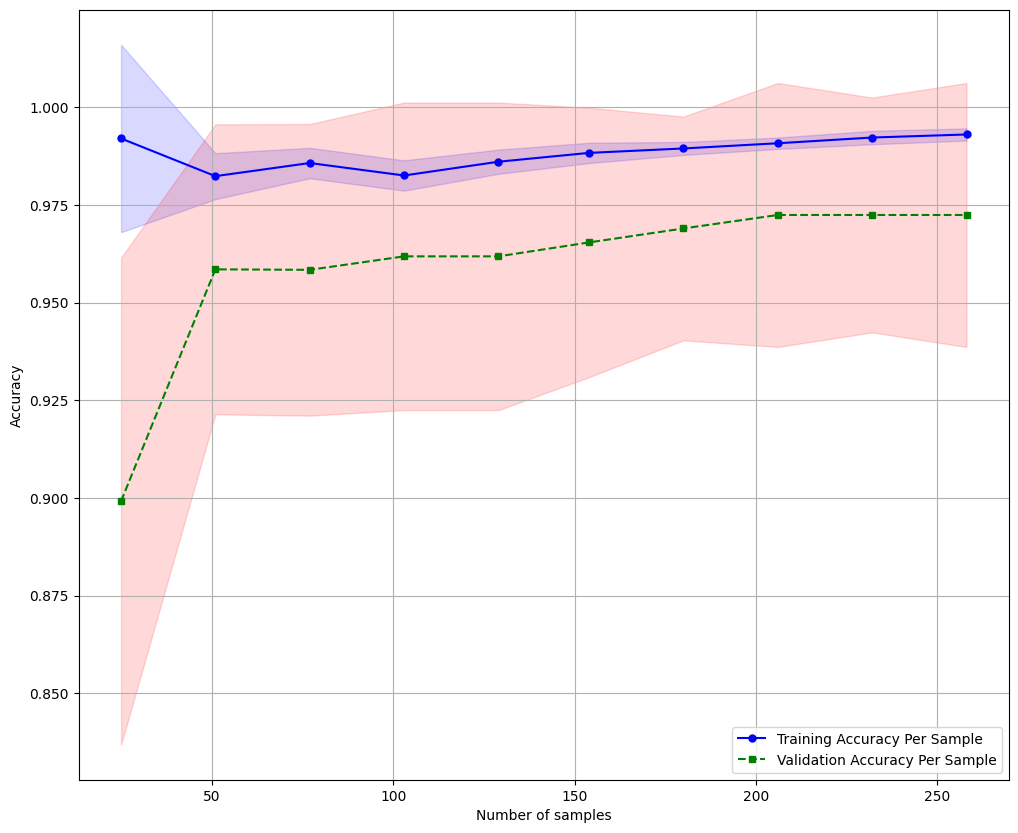

Confusion Matrix
[[ 57   7]
 [  5 102]]
Accuracy: 0.9298, Precision: 0.9358, Recall: 0.9533, F1: 0.9444, AUC: 0.9869


In [2]:
outlier_params = {'eps': 0.5, 'min_samples': 8, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'dbscan', outlier_params)

helper.train_and_evaluate_model('rf', df_train_outlier_removed.iloc[:,:-1], X_test_scaled, df_train_outlier_removed.iloc[:,-1], y_test)